#Initializing project

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_path = "/content/drive/My Drive/CSCI_534 Project/Project/Gamestop Data"
# project_path = './'

gm_stock = pd.read_csv(project_path+'/Gamestop Stock Data.csv') #181 of sample
gm_vader = pd.read_csv(project_path+'/gamestop_english_vader.csv',index_col=0)

gm_vader.shape

(298264, 7)

In [3]:
gm_vader = gm_vader.dropna(subset=['Datetime','Text','scores'])

In [4]:
gm_vader.shape #1042457
#613705 is only available

(298264, 7)

# Preparing data
In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and vader scores.

In [5]:
#In this part we are preparing data for processing (taking datetime and scores from vader data)
gm_vader_date = gm_vader['Datetime'].to_numpy()
gm_vader_scores = gm_vader['scores'].to_numpy()

NEG = 1
NEU = 3
POS = 5
COM = -1 #remove '}'

In [6]:
#Cleaning gm data
gm_vader_neg =[]
gm_vader_neu =[]
gm_vader_pos =[]
gm_vader_com =[] #don't know if needed
for i in range(len(gm_vader_date)):
  gm_vader_date[i] = gm_vader_date[i].split()[0]    #cleaning the data only the date
  #change date fromat
  #mm/dd/yyy
  gm_vader_date[i]=time.strptime(gm_vader_date[i],'%Y-%m-%d') 
  gm_vader_date[i]=time.strftime('%m/%d/%Y',gm_vader_date[i])

  res = gm_vader_scores[i].replace(',','').split()
  gm_vader_neg.append(float(res[NEG]))
  gm_vader_neu.append(float(res[NEU]))
  gm_vader_pos.append(float(res[POS]))
  gm_vader_com.append(float(res[COM].replace("}","")))

In [7]:
#put gm vader data in df
gm_vader_df = pd.DataFrame({
    'Date':gm_vader_date,
    'neg':gm_vader_neg,
    'neu':gm_vader_neu,
    'pos':gm_vader_pos,
    'com':gm_vader_com
})
#combine data on the same date(caculate the descriptive statistics of "neg","neu","pos","com")
#mean
gm_vader_df_mean = gm_vader_df.groupby(['Date']).agg({'neg':np.mean,'neu':np.mean,'pos':np.mean,'com':np.mean}).reset_index()
#median
gm_vader_df_median = gm_vader_df.groupby(['Date']).agg({'neg':np.median,'neu':np.median,'pos':np.median,'com':np.median}).reset_index()
#std
gm_vader_df_std = gm_vader_df.groupby(['Date']).agg({'neg':np.std,'neu':np.std,'pos':np.std,'com':np.std}).reset_index()
#max
gm_vader_df_max = gm_vader_df.groupby(['Date']).agg({'neg':np.max,'neu':np.max,'pos':np.max,'com':np.max}).reset_index()
#min
gm_vader_df_min = gm_vader_df.groupby(['Date']).agg({'neg':np.min,'neu':np.min,'pos':np.min,'com':np.min}).reset_index()
#skewness
gm_vader_df_skewness = gm_vader_df.groupby(['Date']).agg({'neg':stats.skew,'neu':stats.skew,'pos':stats.skew,'com':stats.skew}).reset_index()
#kurtosis
gm_vader_df_kurtosis = gm_vader_df.groupby(['Date']).agg({'neg':stats.kurtosis,'neu':stats.kurtosis,'pos':stats.kurtosis,'com':stats.kurtosis}).reset_index()
#Jarque-Bera
#To test if the data have normal distribution base on skewness and kurotsis

In [8]:
#clean the stock date(taking datetime and close from stock data)
gm_stock_date = gm_stock['Date'].to_numpy()
gm_stock_close = gm_stock['Close'].to_numpy()

In [9]:
#get stock date and change format
for i in range(len(gm_stock_date)):
  gm_stock_date[i] = gm_stock_date[i].split()[0]
  gm_stock_date[i]=time.strptime(gm_stock_date[i],'%m/%d/%Y')
  gm_stock_date[i]=time.strftime('%m/%d/%Y',gm_stock_date[i])

In [10]:
#put gm stock data in df
gm_stock_df = pd.DataFrame({
    'Date':gm_stock_date,
    'close':gm_stock_close
})

#normalizing the stock value
gm_stock_df['close'] = (gm_stock_df['close'] - gm_stock_df['close'].min()) / (gm_stock_df['close'].max() - gm_stock_df['close'].min())
gm_stock_df

,Date,close
0,07/01/2020,0.001717
1,07/02/2020,0.001280
2,07/06/2020,0.001135
3,07/07/2020,0.000698
4,07/08/2020,0.001193
...,...,...
176,03/15/2021,0.629372
177,03/16/2021,0.594541
178,03/17/2021,0.599313
179,03/18/2021,0.575860


In [11]:
#merge vader mean data and stock data
gm_merge_df_mean = pd.merge(gm_vader_df_mean,gm_stock_df,on='Date',how="left")
gm_merge_df_mean = gm_merge_df_mean.dropna().reset_index(drop=True)
gm_merge_df_mean.shape #Only 20 days worth of data

#median
gm_merge_df_median = pd.merge(gm_vader_df_median,gm_stock_df,on='Date',how="left")
gm_merge_df_median = gm_merge_df_median.dropna().reset_index(drop=True)

#std
gm_merge_df_std = pd.merge(gm_vader_df_std,gm_stock_df,on='Date',how="left")
gm_merge_df_std = gm_merge_df_std.dropna().reset_index(drop=True)

#max
gm_merge_df_max = pd.merge(gm_vader_df_max,gm_stock_df,on='Date',how="left")
gm_merge_df_max = gm_merge_df_max.dropna().reset_index(drop=True)

#min
gm_merge_df_min = pd.merge(gm_vader_df_min,gm_stock_df,on='Date',how="left")
gm_merge_df_min = gm_merge_df_min.dropna().reset_index(drop=True)


In [12]:
gm_merge_df_mean[['neg','neu','pos','com']][:-10].shape[0]

34

In [13]:
gm_merge_df_mean.shape

(44, 6)

# Training the linear model

Training the linear model for Gamestop (all feature)

In [14]:
#Creating a model based on the gm data
#gm_merge_df[['neg','neu','pos','com']] is the data or x or feature
#gm_merge_df[['close']] is the label
#mean
reg_gm_mean = LinearRegression().fit(gm_merge_df_mean[['neg','neu','pos','com']][:-10], gm_merge_df_mean[['close']][:-10])
#median
reg_gm_median = LinearRegression().fit(gm_merge_df_median[['neg','neu','pos','com']][:-10], gm_merge_df_median[['close']][:-10])
#std
reg_gm_std = LinearRegression().fit(gm_merge_df_std[['neg','neu','pos','com']][:-10], gm_merge_df_std[['close']][:-10])
#max
reg_gm_max = LinearRegression().fit(gm_merge_df_max[['neg','neu','pos','com']][:-10], gm_merge_df_max[['close']][:-10])
#min
reg_gm_min = LinearRegression().fit(gm_merge_df_min[['neg','neu','pos','com']][:-10], gm_merge_df_min[['close']][:-10])

# Plot the data and model of for each base line

Predict AMC model with all feature

In [15]:
#each model is predicting the label using the data that we have
#pred_gm is a numpy array consisting the values of prediction of the gm data that we use for the training
#mean 
pred_gm_mean = reg_gm_mean.predict(gm_merge_df_mean[['neg','neu','pos','com']][-10:])
#median
pred_gm_median = reg_gm_median.predict(gm_merge_df_median[['neg','neu','pos','com']][-10:])
#std
pred_gm_std = reg_gm_std.predict(gm_merge_df_std[['neg','neu','pos','com']][-10:])
#max
pred_gm_max = reg_gm_max.predict(gm_merge_df_max[['neg','neu','pos','com']][-10:])
#min
pred_gm_min = reg_gm_min.predict(gm_merge_df_min[['neg','neu','pos','com']][-10:])

#To plot the training model
#mean 
train_gm_mean = reg_gm_mean.predict(gm_merge_df_mean[['neg','neu','pos','com']][:-10])
#median
train_gm_median = reg_gm_median.predict(gm_merge_df_median[['neg','neu','pos','com']][:-10])
#std
train_gm_std = reg_gm_std.predict(gm_merge_df_std[['neg','neu','pos','com']][:-10])
#max
train_gm_max = reg_gm_max.predict(gm_merge_df_max[['neg','neu','pos','com']][:-10])
#min
train_gm_min = reg_gm_min.predict(gm_merge_df_min[['neg','neu','pos','com']][:-10])


#In this part, I am combining the data  of each company with the prediction
#mean
gm_merge_pred_mean = pd.concat([gm_merge_df_mean[:-10], pd.DataFrame(train_gm_mean,columns=['pred'])], axis=1)
#median
gm_merge_pred_median = pd.concat([gm_merge_df_median[:-10], pd.DataFrame(train_gm_median,columns=['pred'])], axis=1)
#std
gm_merge_pred_std = pd.concat([gm_merge_df_std[:-10], pd.DataFrame(train_gm_std,columns=['pred'])], axis=1)
#max
gm_merge_pred_max = pd.concat([gm_merge_df_max[:-10], pd.DataFrame(train_gm_max,columns=['pred'])], axis=1)
#min
gm_merge_pred_min = pd.concat([gm_merge_df_min[:-10], pd.DataFrame(train_gm_min,columns=['pred'])], axis=1)

Display the perfomance of the model

In [16]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
gm_score_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_mean)
#median
gm_score_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_median)
#std
gm_score_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_std)
#max
gm_score_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_max)
#min
gm_score_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_min)
[gm_score_mean,gm_score_median,gm_score_std,gm_score_max,gm_score_min]

[0.012232432015844107,
 0.0038206366219111407,
 0.0033453543826639847,
 0.0029792424052865482,
 0.003384589692050026]

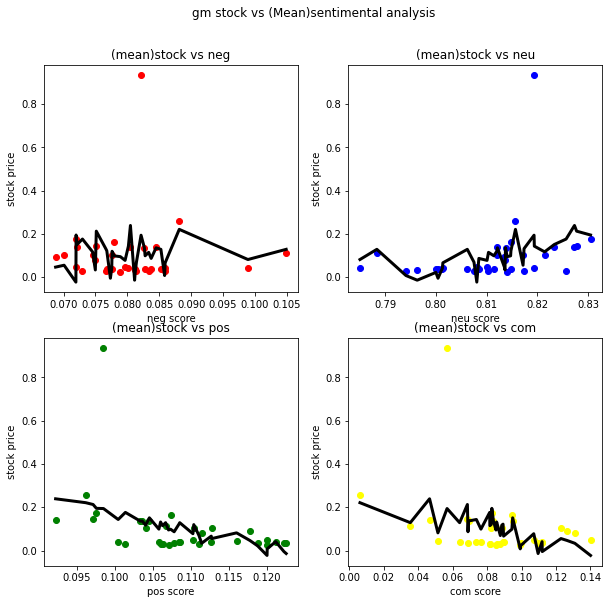

In [17]:
#plot gm
#In this part, it is plotting the data with the stock + the model itself
#Mean sentimental analysis
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Mean)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_mean = gm_merge_pred_mean.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_mean[['neg']],gm_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_mean[['neg']], gm_sort_neg_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('(mean)stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_mean = gm_merge_pred_mean.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_mean[['neu']],gm_sort_neu_mean[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_mean[['neu']], gm_sort_neu_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(mean)stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_mean = gm_merge_pred_mean.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_mean[['pos']],gm_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_mean[['pos']], gm_sort_pos_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('(mean)stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_mean = gm_merge_pred_mean.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_mean[['com']],gm_sort_com_mean[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_mean[['com']], gm_sort_com_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('(mean)stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

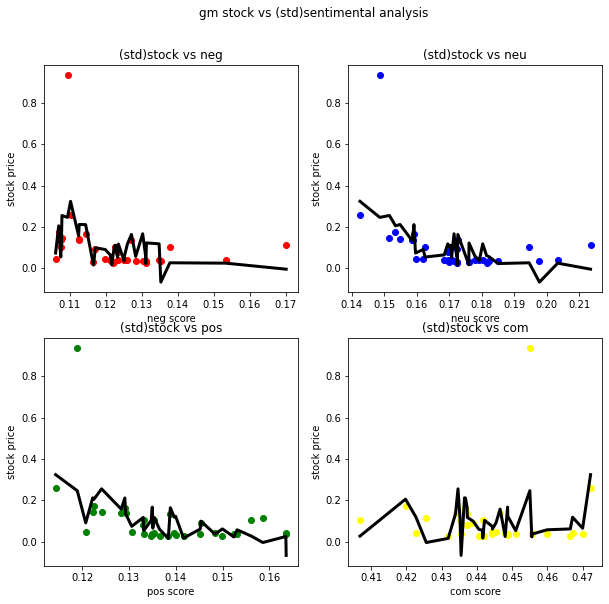

In [18]:
#std sentimental analysis
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (std)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_std = gm_merge_pred_std.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_std[['neg']],gm_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_std[['neg']], gm_sort_neg_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('(std)stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_std = gm_merge_pred_std.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_std[['neu']],gm_sort_neu_std[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_std[['neu']], gm_sort_neu_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(std)stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_std = gm_merge_pred_std.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_std[['pos']],gm_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_std[['pos']], gm_sort_pos_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('(std)stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_std = gm_merge_pred_std.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_std[['com']],gm_sort_com_std[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_std[['com']], gm_sort_com_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('(std)stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

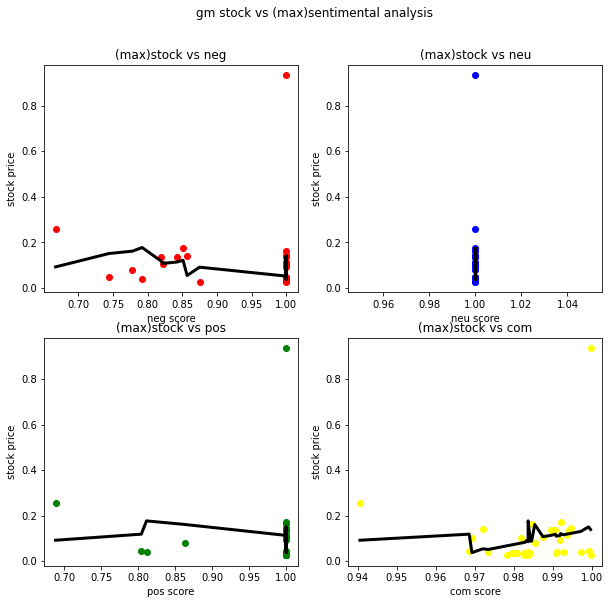

In [19]:
#Max sentimental analysis
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (max)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_max = gm_merge_pred_max.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_max[['neg']],gm_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_max[['neg']], gm_sort_neg_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('(max)stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_max = gm_merge_pred_max.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_max[['neu']],gm_sort_neu_max[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_max[['neu']], gm_sort_neu_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(max)stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_max = gm_merge_pred_max.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_max[['pos']],gm_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_max[['pos']], gm_sort_pos_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('(max)stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_max = gm_merge_pred_max.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_max[['com']],gm_sort_com_max[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_max[['com']], gm_sort_com_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('(max)stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

#Plot data against time

Plotting Gamestop stock with mean sentimental analysis

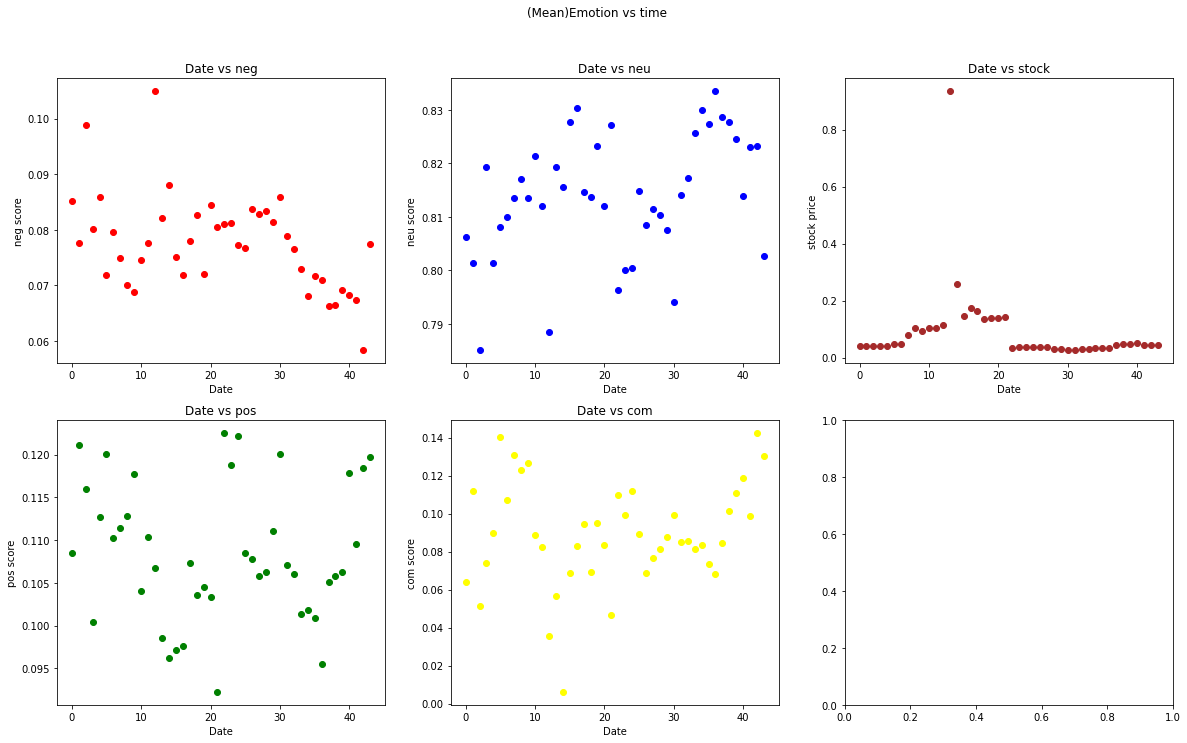

In [20]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(Mean)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_mean.shape[0])],gm_sort_neg_mean[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_mean.shape[0])],gm_sort_neu_mean[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_mean.shape[0])],gm_sort_pos_mean[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_mean.shape[0])],gm_sort_com_mean[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

In [21]:
gm_sort_neg_mean.shape[0]

44

Plotting Gamestop stock with median sentimental analysis

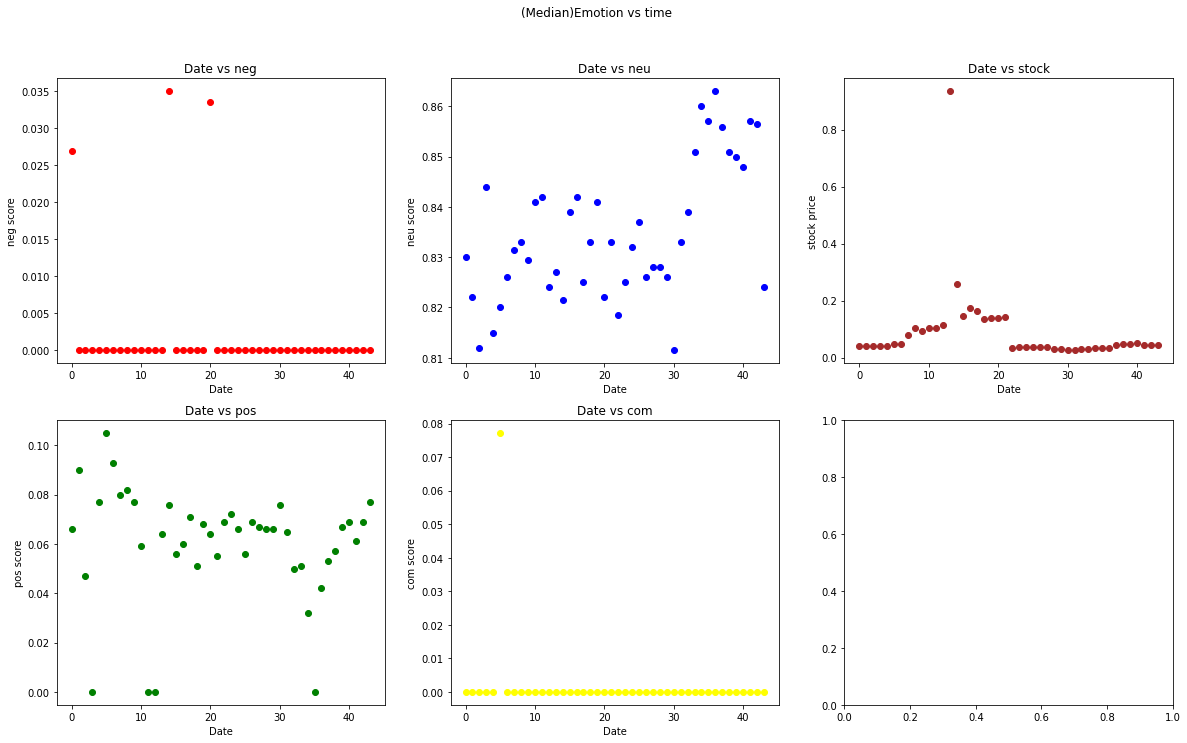

In [22]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(Median)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_median = gm_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_median.shape[0])],gm_sort_neg_median[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_median = gm_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_median.shape[0])],gm_sort_neu_median[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_median = gm_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_median.shape[0])],gm_sort_pos_median[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_median = gm_merge_df_median.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_median.shape[0])],gm_sort_com_median[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_median.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting gamestop stock with std sentimental analysis

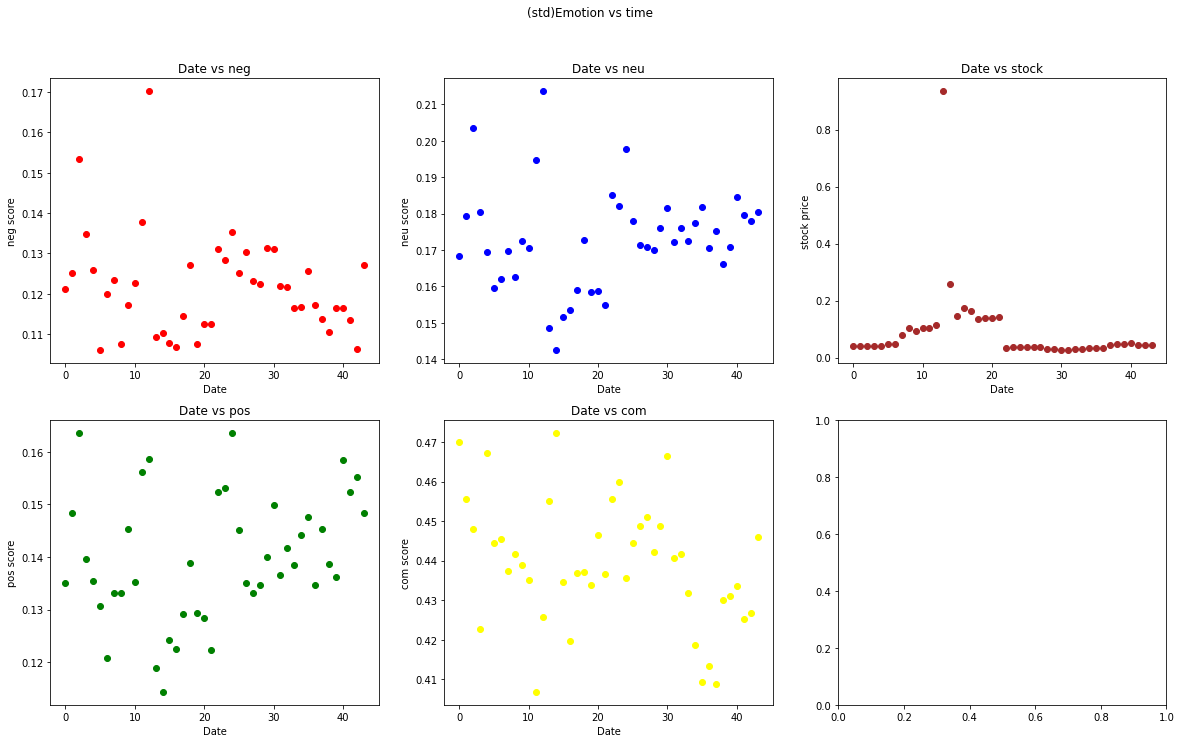

In [23]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(std)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_std = gm_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_std.shape[0])],gm_sort_neg_std[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_std = gm_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_std.shape[0])],gm_sort_neu_std[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_std = gm_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_std.shape[0])],gm_sort_pos_std[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_std = gm_merge_df_std.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_std.shape[0])],gm_sort_com_std[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_std.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting Gamestop stock with maximum sentimental analysis

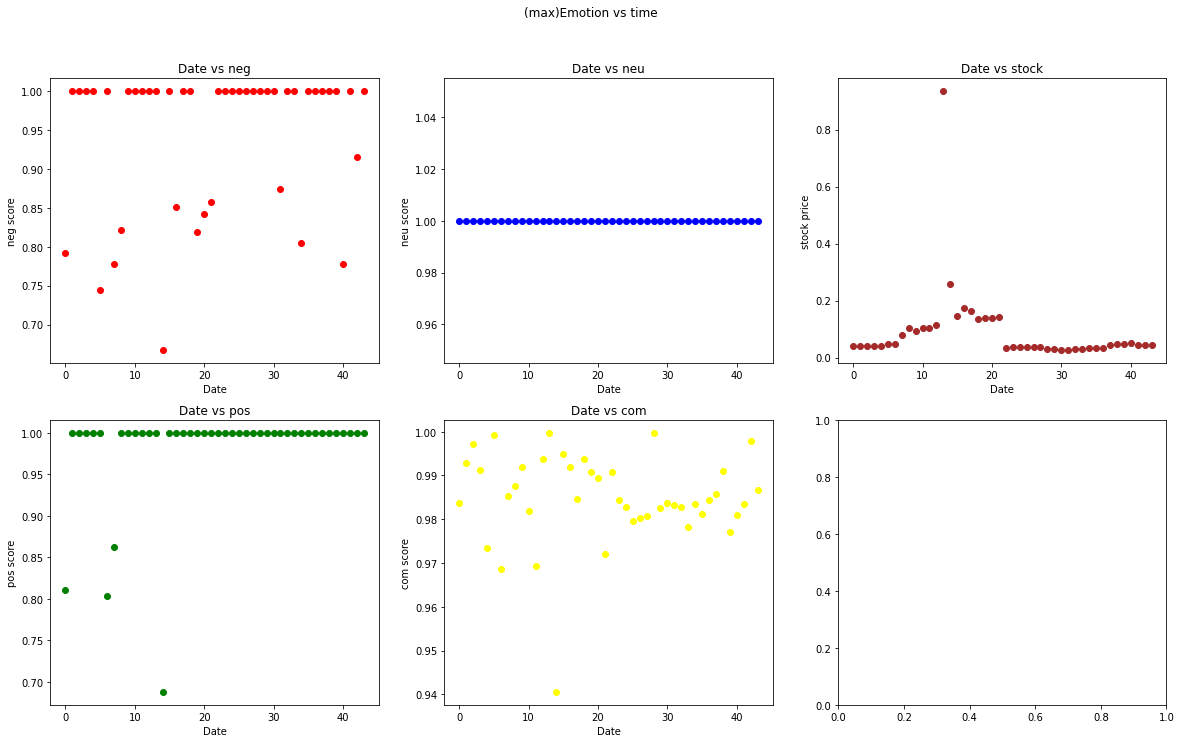

In [24]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(max)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_max = gm_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_max.shape[0])],gm_sort_neg_max[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_max = gm_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_max.shape[0])],gm_sort_neu_max[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_max = gm_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_max.shape[0])],gm_sort_pos_max[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_max = gm_merge_df_max.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_max.shape[0])],gm_sort_com_max[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_max.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

Plotting AMC stock with minimum sentimental analysis

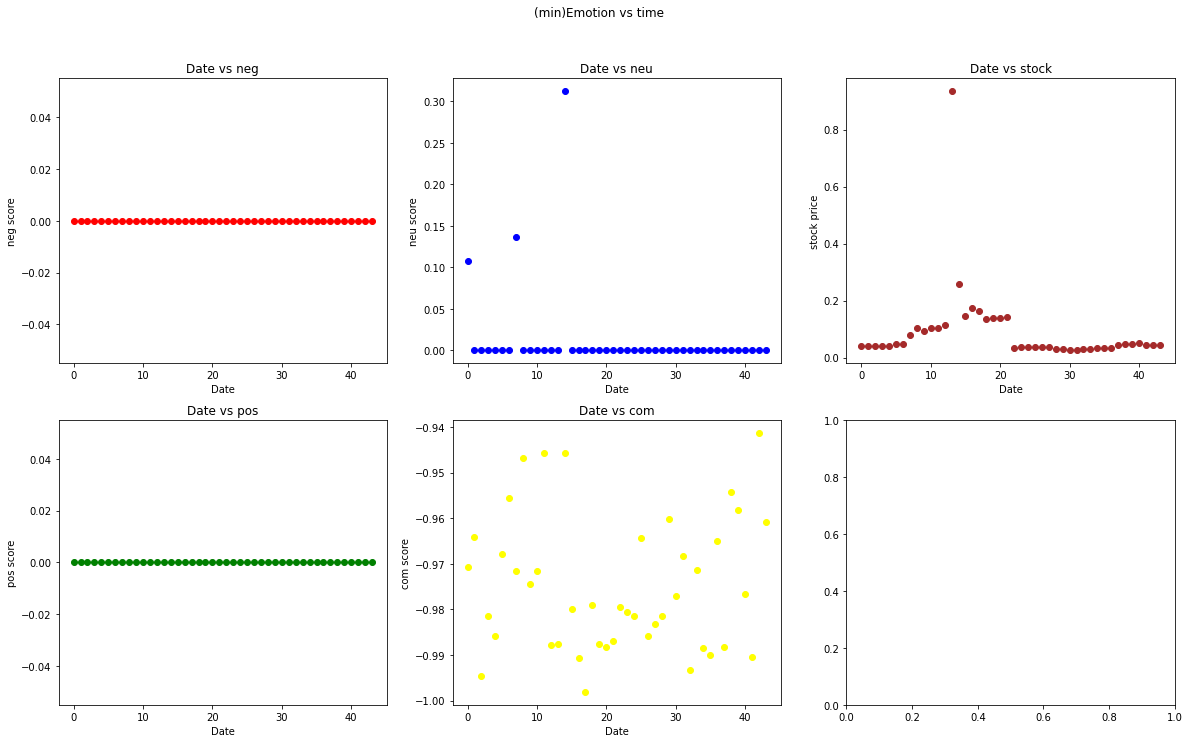

In [25]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('(min)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_neg_min = gm_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_neg_min.shape[0])],gm_sort_neg_min[['neg']],color='red',label='neg')
axs[0,0].set_title('Date vs neg')
axs[0,0].set(xlabel='Date', ylabel='neg score')

gm_sort_neu_min = gm_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_neu_min.shape[0])],gm_sort_neu_min[['neu']],color='blue',label='neu')
axs[0,1].set_title('Date vs neu')
axs[0,1].set(xlabel='Date', ylabel='neu score')

gm_sort_pos_min = gm_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_pos_min.shape[0])],gm_sort_pos_min[['pos']],color='green',label='pos')
axs[1,0].set_title('Date vs pos')
axs[1,0].set(xlabel='Date', ylabel='pos score')

gm_sort_com_min = gm_merge_df_min.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_com_min.shape[0])],gm_sort_com_min[['com']],color='yellow',label='com')
axs[1,1].set_title('Date vs com')
axs[1,1].set(xlabel='Date', ylabel='com score')

gm_sort_date = gm_merge_df_min.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[0,2].set_title('Date vs stock')
axs[0,2].set(xlabel='Date', ylabel='stock price')
plt.show()

#Training with different method

In [26]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_mean = LinearRegression().fit(gm_merge_df_mean[['neg']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_neu_mean = LinearRegression().fit(gm_merge_df_mean[['neu']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_pos_mean = LinearRegression().fit(gm_merge_df_mean[['pos']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_com_mean = LinearRegression().fit(gm_merge_df_mean[['com']][:-10], gm_merge_df_mean[['close']][:-10])

In [27]:
#predict the stock price of gm using new models
pred_gm_neg_mean = reg_gm_neg_mean.predict(gm_merge_df_mean[['neg']][-10:])
pred_gm_neu_mean = reg_gm_neu_mean.predict(gm_merge_df_mean[['neu']][-10:])
pred_gm_pos_mean = reg_gm_pos_mean.predict(gm_merge_df_mean[['pos']][-10:])
pred_gm_com_mean = reg_gm_com_mean.predict(gm_merge_df_mean[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_mean = reg_gm_neg_mean.predict(gm_merge_df_mean[['neg']][:-10])
train_gm_neu_mean = reg_gm_neu_mean.predict(gm_merge_df_mean[['neu']][:-10])
train_gm_pos_mean = reg_gm_pos_mean.predict(gm_merge_df_mean[['pos']][:-10])
train_gm_com_mean = reg_gm_com_mean.predict(gm_merge_df_mean[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_mean = pd.concat([gm_merge_df_mean[:-10], pd.DataFrame(train_gm_neg_mean,columns=['pred_neg'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_neu_mean,columns=['pred_neu'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_pos_mean,columns=['pred_pos'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_com_mean,columns=['pred_com'])], axis=1)

gm_merge_pred1_mean

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.085261,0.806193,0.108542,0.064057,0.038992,0.106694,0.082569,0.103175,0.142302
1,01/05/2021,0.077557,0.801286,0.121144,0.111906,0.039341,0.101367,0.062504,0.001463,0.054686
2,01/06/2021,0.098909,0.785074,0.116007,0.051462,0.042222,0.116130,-0.003802,0.042928,0.165364
3,01/07/2021,0.080166,0.819378,0.100463,0.073776,0.041407,0.103171,0.136495,0.168389,0.124505
4,01/08/2021,0.085930,0.801384,0.112683,0.089578,0.040272,0.107156,0.062903,0.069758,0.095571
5,01/11/2021,0.071934,0.808059,0.120011,0.140031,0.046820,0.097480,0.090201,0.010609,0.003186
6,01/12/2021,0.079646,0.810071,0.110278,0.107069,0.046849,0.102811,0.098432,0.089164,0.063541
7,01/13/2021,0.074983,0.813598,0.111420,0.130928,0.080166,0.099588,0.112856,0.079946,0.019854
8,01/14/2021,0.070085,0.817158,0.112759,0.122872,0.104929,0.096201,0.127414,0.069144,0.034605
9,01/15/2021,0.068753,0.813490,0.117752,0.126363,0.092097,0.095280,0.112411,0.028839,0.028213


In [28]:
gm_score_neg_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_neg_mean)
gm_score_neu_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_neu_mean)
gm_score_pos_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_pos_mean)
gm_score_com_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_com_mean)
[gm_score_neg_mean,gm_score_neu_mean,gm_score_pos_mean,gm_score_com_mean]

[0.0028215917623911476,
 0.013695648940383397,
 0.008645141183796725,
 0.0031969908976732563]

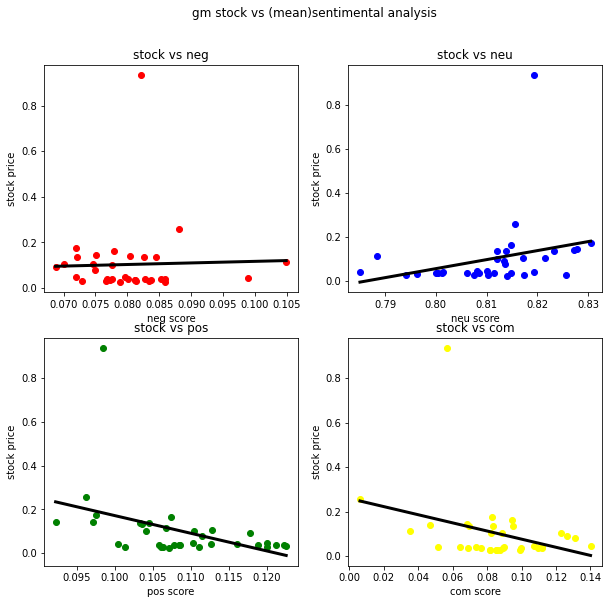

In [29]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (mean)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_mean = gm_merge_pred1_mean.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_mean[['neg']],gm_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_mean[['neg']], gm_sort_neg_mean[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_mean = gm_merge_pred1_mean.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_mean[['neu']],gm_sort_neu_mean[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_mean[['neu']], gm_sort_neu_mean[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_mean = gm_merge_pred1_mean.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_mean[['pos']],gm_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_mean[['pos']], gm_sort_pos_mean[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_mean = gm_merge_pred1_mean.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_mean[['com']],gm_sort_com_mean[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_mean[['com']], gm_sort_com_mean[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

Training with median sentimental analysis

In [30]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_median = LinearRegression().fit(gm_merge_df_median[['neg']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_neu_median = LinearRegression().fit(gm_merge_df_median[['neu']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_pos_median = LinearRegression().fit(gm_merge_df_median[['pos']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_com_median = LinearRegression().fit(gm_merge_df_median[['com']][:-10], gm_merge_df_median[['close']][:-10])

#predict the stock price of gm using new models
pred_gm_neg_median = reg_gm_neg_median.predict(gm_merge_df_median[['neg']][-10:])
pred_gm_neu_median = reg_gm_neu_median.predict(gm_merge_df_median[['neu']][-10:])
pred_gm_pos_median = reg_gm_pos_median.predict(gm_merge_df_median[['pos']][-10:])
pred_gm_com_median = reg_gm_com_median.predict(gm_merge_df_median[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_median = reg_gm_neg_median.predict(gm_merge_df_median[['neg']][:-10])
train_gm_neu_median = reg_gm_neu_median.predict(gm_merge_df_median[['neu']][:-10])
train_gm_pos_median = reg_gm_pos_median.predict(gm_merge_df_median[['pos']][:-10])
train_gm_com_median = reg_gm_com_median.predict(gm_merge_df_median[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_median = pd.concat([gm_merge_df_median[:-10], pd.DataFrame(train_gm_neg_median,columns=['pred_neg'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_neu_median,columns=['pred_neu'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_pos_median,columns=['pred_pos'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_com_median,columns=['pred_com'])], axis=1)

gm_merge_pred1_median

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.0270,0.8300,0.066,0.0000,0.038992,0.144748,0.103225,0.102792,0.104919
1,01/05/2021,0.0000,0.8220,0.090,0.0000,0.039341,0.098387,0.102873,0.100167,0.104919
2,01/06/2021,0.0000,0.8120,0.047,0.0000,0.042222,0.098387,0.102434,0.104870,0.104919
3,01/07/2021,0.0000,0.8440,0.000,0.0000,0.041407,0.098387,0.103840,0.110009,0.104919
4,01/08/2021,0.0000,0.8150,0.077,0.0000,0.040272,0.098387,0.102566,0.101589,0.104919
5,01/11/2021,0.0000,0.8200,0.105,0.0772,0.046820,0.098387,0.102785,0.098527,0.046820
6,01/12/2021,0.0000,0.8260,0.093,0.0000,0.046849,0.098387,0.103049,0.099839,0.104919
7,01/13/2021,0.0000,0.8315,0.080,0.0000,0.080166,0.098387,0.103291,0.101261,0.104919
8,01/14/2021,0.0000,0.8330,0.082,0.0000,0.104929,0.098387,0.103357,0.101042,0.104919
9,01/15/2021,0.0000,0.8295,0.077,0.0000,0.092097,0.098387,0.103203,0.101589,0.104919


In [31]:
gm_score_neg_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_neg_median)
gm_score_neu_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_neu_median)
gm_score_pos_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_pos_median)
gm_score_com_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_com_median)
[gm_score_neg_median,gm_score_neu_median,gm_score_pos_median,gm_score_com_median]

[0.0031596471121495087,
 0.003845721765002292,
 0.0038771950044949864,
 0.003932069170728013]

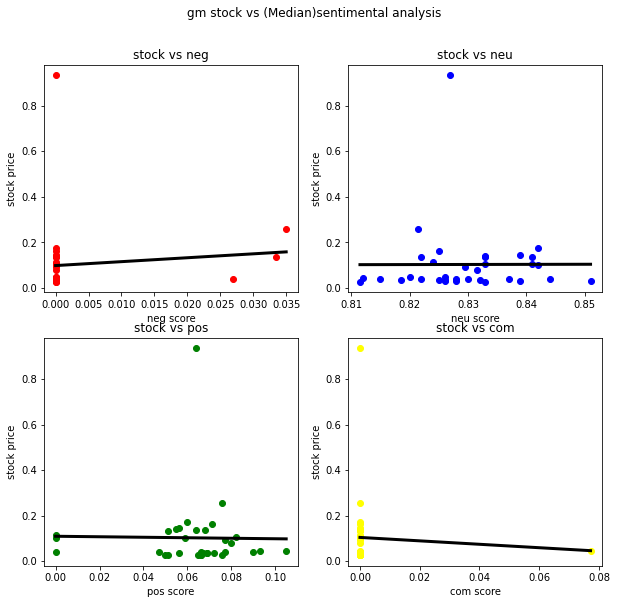

In [32]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Median)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_median = gm_merge_pred1_median.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_median[['neg']],gm_sort_neg_median[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_median[['neg']], gm_sort_neg_median[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_median = gm_merge_pred1_median.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_median[['neu']],gm_sort_neu_median[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_median[['neu']], gm_sort_neu_median[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_median = gm_merge_pred1_median.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_median[['pos']],gm_sort_pos_median[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_median[['pos']], gm_sort_pos_median[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_median = gm_merge_pred1_median.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_median[['com']],gm_sort_com_median[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_median[['com']], gm_sort_com_median[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

Training with std sentimental analysis

In [33]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_std = LinearRegression().fit(gm_merge_df_std[['neg']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_neu_std = LinearRegression().fit(gm_merge_df_std[['neu']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_pos_std = LinearRegression().fit(gm_merge_df_std[['pos']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_com_std = LinearRegression().fit(gm_merge_df_std[['com']][:-10], gm_merge_df_std[['close']][:-10])

In [34]:
#predict the stock price of gm using new models
pred_gm_neg_std = reg_gm_neg_std.predict(gm_merge_df_std[['neg']][-10:])
pred_gm_neu_std = reg_gm_neu_std.predict(gm_merge_df_std[['neu']][-10:])
pred_gm_pos_std = reg_gm_pos_std.predict(gm_merge_df_std[['pos']][-10:])
pred_gm_com_std = reg_gm_com_std.predict(gm_merge_df_std[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_std = reg_gm_neg_std.predict(gm_merge_df_std[['neg']][:-10])
train_gm_neu_std = reg_gm_neu_std.predict(gm_merge_df_std[['neu']][:-10])
train_gm_pos_std = reg_gm_pos_std.predict(gm_merge_df_std[['pos']][:-10])
train_gm_com_std = reg_gm_com_std.predict(gm_merge_df_std[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_std = pd.concat([gm_merge_df_std[:-10], pd.DataFrame(train_gm_neg_std,columns=['pred_neg'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_neu_std,columns=['pred_neu'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_pos_std,columns=['pred_pos'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_com_std,columns=['pred_com'])], axis=1)

gm_merge_pred1_std

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.121233,0.168464,0.135114,0.470033,0.038992,0.110411,0.117485,0.117912,0.121622
1,01/05/2021,0.125094,0.179244,0.148386,0.455671,0.039341,0.096938,0.070489,0.046523,0.111661
2,01/06/2021,0.153332,0.203432,0.163518,0.448032,0.042222,-0.001597,-0.034953,-0.034863,0.106362
3,01/07/2021,0.134839,0.180319,0.139690,0.422710,0.041407,0.062933,0.065803,0.093297,0.088800
4,01/08/2021,0.126022,0.169531,0.135369,0.467165,0.040272,0.093702,0.112832,0.116538,0.119633
5,01/11/2021,0.106038,0.159597,0.130605,0.444384,0.046820,0.163434,0.156139,0.142161,0.103832
6,01/12/2021,0.119859,0.161967,0.120779,0.445434,0.046849,0.115206,0.145805,0.195012,0.104561
7,01/13/2021,0.123505,0.169586,0.133061,0.437314,0.080166,0.102483,0.112594,0.128954,0.098929
8,01/14/2021,0.107474,0.162571,0.133139,0.441632,0.104929,0.158424,0.143172,0.128535,0.101924
9,01/15/2021,0.117119,0.172388,0.145360,0.438925,0.092097,0.124767,0.100377,0.062803,0.100046


In [35]:
gm_score_neg_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_neg_std)
gm_score_neu_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_neu_std)
gm_score_pos_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_pos_std)
gm_score_com_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_com_std)
[gm_score_neg_std,gm_score_neu_std,gm_score_pos_std,gm_score_com_std]

[0.007558055026101548,
 0.002184200629210659,
 0.0021051858058455616,
 0.0022884424373985374]

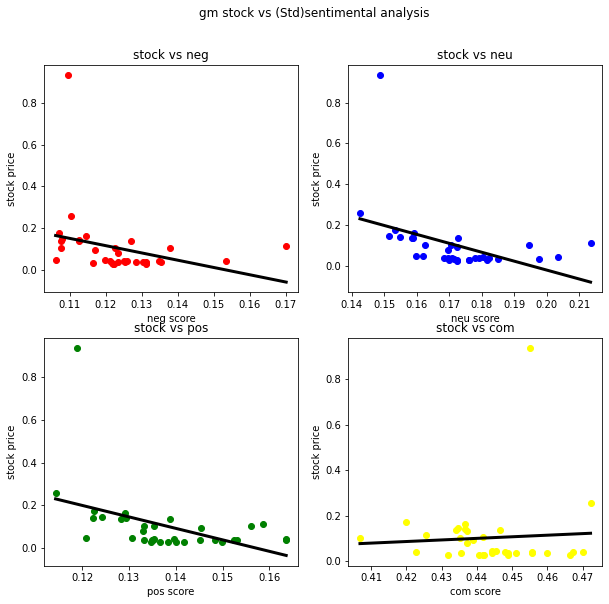

In [36]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Std)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_std = gm_merge_pred1_std.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_std[['neg']],gm_sort_neg_std[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_std[['neg']], gm_sort_neg_std[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_std = gm_merge_pred1_std.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_std[['neu']],gm_sort_neu_std[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_std[['neu']], gm_sort_neu_std[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_std = gm_merge_pred1_std.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_std[['pos']],gm_sort_pos_std[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_std[['pos']], gm_sort_pos_std[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_std = gm_merge_pred1_std.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_std[['com']],gm_sort_com_std[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_std[['com']], gm_sort_com_std[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()

Training with maximum sentimental analysis

In [37]:
#Training models based on the gm data for four features(neg,neu,pos,com) separately
reg_gm_neg_max = LinearRegression().fit(gm_merge_df_max[['neg']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_neu_max = LinearRegression().fit(gm_merge_df_max[['neu']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_pos_max = LinearRegression().fit(gm_merge_df_max[['pos']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_com_max = LinearRegression().fit(gm_merge_df_max[['com']][:-10], gm_merge_df_max[['close']][:-10])

In [38]:
#predict the stock price of gm using new models
pred_gm_neg_max = reg_gm_neg_max.predict(gm_merge_df_max[['neg']][-10:])
pred_gm_neu_max = reg_gm_neu_max.predict(gm_merge_df_max[['neu']][-10:])
pred_gm_pos_max = reg_gm_pos_max.predict(gm_merge_df_max[['pos']][-10:])
pred_gm_com_max = reg_gm_com_max.predict(gm_merge_df_max[['com']][-10:])

#predict on the training model to plot the data
train_gm_neg_max = reg_gm_neg_max.predict(gm_merge_df_max[['neg']][:-10])
train_gm_neu_max = reg_gm_neu_max.predict(gm_merge_df_max[['neu']][:-10])
train_gm_pos_max = reg_gm_pos_max.predict(gm_merge_df_max[['pos']][:-10])
train_gm_com_max = reg_gm_com_max.predict(gm_merge_df_max[['com']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_max = pd.concat([gm_merge_df_max[:-10], pd.DataFrame(train_gm_neg_max,columns=['pred_neg'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_neu_max,columns=['pred_neu'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_pos_max,columns=['pred_pos'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_com_max,columns=['pred_com'])], axis=1)

gm_merge_pred1_max

,Date,neg,neu,pos,com,close,pred_neg,pred_neu,pred_pos,pred_com
0,01/04/2021,0.792,1.0,0.811,0.9837,0.038992,0.121449,0.10321,0.124384,0.101578
1,01/05/2021,1.000,1.0,1.000,0.9928,0.039341,0.096251,0.10321,0.100052,0.115298
2,01/06/2021,1.000,1.0,1.000,0.9972,0.042222,0.096251,0.10321,0.100052,0.121932
3,01/07/2021,1.000,1.0,1.000,0.9912,0.041407,0.096251,0.10321,0.100052,0.112886
4,01/08/2021,1.000,1.0,1.000,0.9735,0.040272,0.096251,0.10321,0.100052,0.086200
5,01/11/2021,0.744,1.0,1.000,0.9992,0.046820,0.127263,0.10321,0.100052,0.124947
6,01/12/2021,1.000,1.0,0.804,0.9686,0.046849,0.096251,0.10321,0.125285,0.078812
7,01/13/2021,0.778,1.0,0.863,0.9854,0.080166,0.123145,0.10321,0.117689,0.104141
8,01/14/2021,0.822,1.0,1.000,0.9875,0.104929,0.117814,0.10321,0.100052,0.107307
9,01/15/2021,1.000,1.0,1.000,0.9919,0.092097,0.096251,0.10321,0.100052,0.113941


In [39]:
gm_score_neg_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_neg_max)
gm_score_neu_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_neu_max)
gm_score_pos_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_pos_max)
gm_score_com_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_com_max)
[gm_score_neg_max,gm_score_neu_max,gm_score_pos_max,gm_score_com_max]

[0.003723455673598741,
 0.0037217510973408556,
 0.003348448394808515,
 0.0038496219761983827]

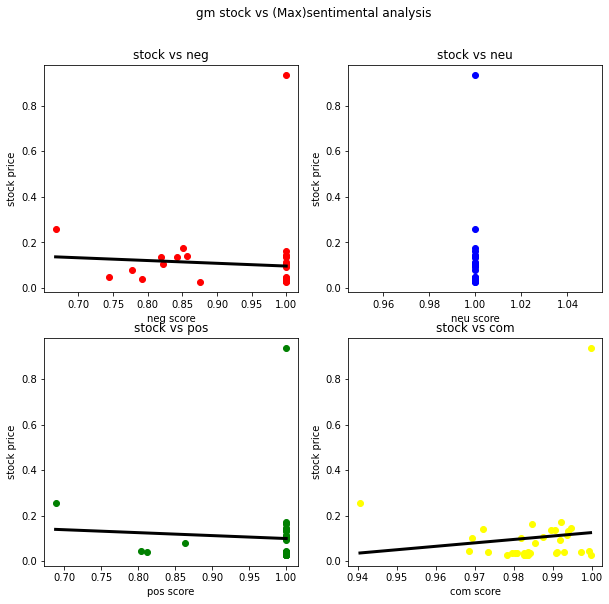

In [40]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Max)sentimental analysis')
fig.set_size_inches(10,8)

gm_sort_neg_max = gm_merge_pred1_max.sort_values(by=['neg'])
axs[0,0].scatter(gm_sort_neg_max[['neg']],gm_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,0].plot(gm_sort_neg_max[['neg']], gm_sort_neg_max[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,0].set_title('stock vs neg')
axs[0,0].set(xlabel='neg score', ylabel='stock price')

gm_sort_neu_max = gm_merge_pred1_max.sort_values(by=['neu'])
axs[0,1].scatter(gm_sort_neu_max[['neu']],gm_sort_neu_max[['close']],color='blue',label='neu') #Plotting the data
axs[0,1].plot(gm_sort_neu_max[['neu']], gm_sort_neu_max[['pred_neu']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs neu')
axs[0,1].set(xlabel='neu score', ylabel='stock price')

gm_sort_pos_max = gm_merge_pred1_max.sort_values(by=['pos'])
axs[1,0].scatter(gm_sort_pos_max[['pos']],gm_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[1,0].plot(gm_sort_pos_max[['pos']], gm_sort_pos_max[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs pos')
axs[1,0].set(xlabel='pos score', ylabel='stock price')

gm_sort_com_max = gm_merge_pred1_max.sort_values(by=['com'])
axs[1,1].scatter(gm_sort_com_max[['com']],gm_sort_com_max[['close']],color='yellow',label='com')#Plotting the data
axs[1,1].plot(gm_sort_com_max[['com']], gm_sort_com_max[['pred_com']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs com')
axs[1,1].set(xlabel='com score', ylabel='stock price')
plt.show()